# Hierarchical Clustering

Hierarchical Clustering typically comes in two flavours (essentially, bottom up or top down): 

* Divisive: Starts with the entire dataset comprising one cluster that is iteratively split one point at a time until each point forms its own cluster.
* Agglomerative: The agglomerative method in reverse - Individual points are iteratively combined until all points belong to the same cluster.

In [15]:
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
%matplotlib inline  

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]    

In [16]:

# plot clustering output on the two datasets
def plot_two_cluster(df1, df2, color1, color2, title1,  title2):
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6*2, 3*2)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(df1[:,0]), max(df1[:,0]))
    ax1.set_ylim(min(df1[:,1]), max(df1[:,1]))
    ax1.scatter(df1[:, 0], df1[:, 1],s=8,lw=0,c= color1)
    
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(df2[:,0]), max(df2[:,0]))
    ax2.set_ylim(min(df2[:,1]), max(df2[:,1]))
    ax2.scatter(df2[:, 0], df2[:, 1],s=8,lw=0,c=color2)
    fig.tight_layout()
    plt.show()

    # plot clustering output on the two datasets
def plot_one_cluster(df1, color1, title1):
    fig, (ax) = plt.subplots(1, 1)
    fig.set_size_inches(6*2, 3*2)
    ax.set_title(title1,fontsize=14)
    ax.set_xlim(min(df1[:,0]), max(df1[:,0]))
    ax.set_ylim(min(df1[:,1]), max(df1[:,1]))
    ax.scatter(df1[:, 0], df1[:, 1],s=8,lw=0,c= color1)
    fig.tight_layout()
    plt.show()

## Complete linkage fails to segment concentric clusters 

In [17]:
# implementing agglomerative (bottom up) hierarchical clustering
# we're going to specify that we want 4 and 2 clusters, respectively
hc_dataset1 = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', 
                                              linkage='ward').fit_predict(dataset1)
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete').fit_predict(dataset2)
print("Dataset 1")
print(*["Cluster "+str(i)+": "+ str(sum(hc_dataset1==i)) for i in range(4)], sep='\n')

Dataset 1
Cluster 0: 990
Cluster 1: 1008
Cluster 2: 1002
Cluster 3: 1000


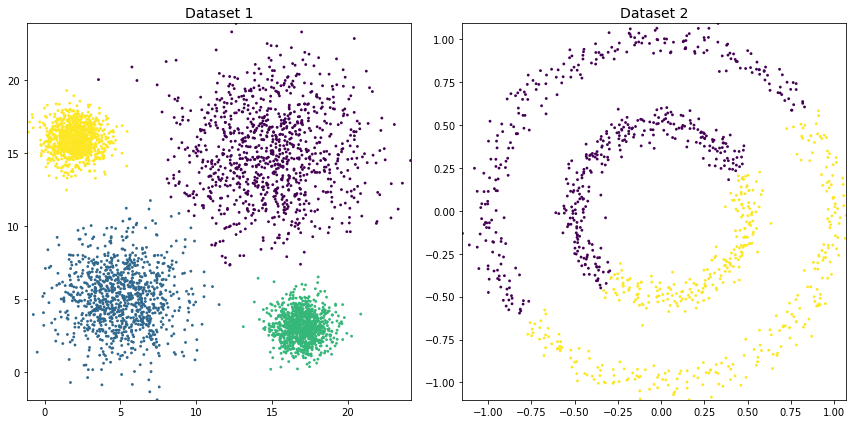

In [19]:
plot_two_cluster(df1=dataset1, df2=dataset2, color1=hc_dataset1, color2=hc_dataset2, title1 = 'Dataset 1',  title2 = 'Dataset 2')

## Single linkage is able to segment concentric clusters

In [ ]:
# repalce Complete linkage with Single linkage
# Use scikit-learn version >0.20 if you are getting error for linkage='single'
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single').fit_predict(dataset2)

In [ ]:
plot_two_cluster(df1=dataset1, df2=dataset2, color1=hc_dataset1, color2=hc_dataset2, title1 = 'Dataset 1',  title2 = 'Dataset 2')

## Alternative to Single linkage for clustering dataset2 correctly

By imposing simple connectivity constraints (points can only cluster with their n(=5) nearest neighbours), HC captures the non-globular structures within the dataset using complete linkage.

In [22]:
connect = kneighbors_graph(dataset2, n_neighbors=5, include_self=False)
hc_dataset2_connectivity = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete',connectivity=connect).fit_predict(dataset2)

C:\Users\deepa\Anaconda3\envs\dlcpu_py3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


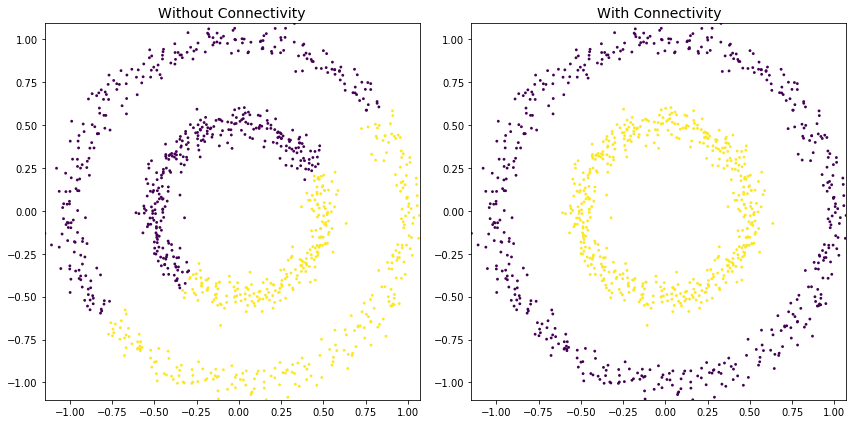

In [23]:
plot_two_cluster(dataset2, dataset2,hc_dataset2,hc_dataset2_connectivity,
             title1='Without Connectivity', title2='With Connectivity')

## Cons of HC


* HC is that it requires too much memory for large datasets (that n x n matrix blows up pretty quickly). 
Divisive clustering is $O(2^n)$, while agglomerative clustering comes in somewhat better at $O(n^2 log(n))$ (though special cases of $O(n^2)$ are available for single and maximum linkage agglomerative clustering).